# Analyzing names given to babies with time

This analysis is inspired by a similar one given by Wes McKinney, the author of pandas, at a pandas tutorial at PyCon 2012. 

In [1]:
import pandas as pd

In [2]:
# let's load some decent size dataset (1/4 million rows)
names = pd.DataFrame.from_csv("baby_names.csv")
print names
names.head(20)

                 name   percent  sex
year                                
1880-01-01       John  0.081541  boy
1880-01-01    William  0.080511  boy
1880-01-01      James  0.050057  boy
1880-01-01    Charles  0.045167  boy
1880-01-01     George  0.043292  boy
1880-01-01      Frank  0.027380  boy
1880-01-01     Joseph  0.022229  boy
1880-01-01     Thomas  0.021401  boy
1880-01-01      Henry  0.020641  boy
1880-01-01     Robert  0.020404  boy
1880-01-01     Edward  0.019965  boy
1880-01-01      Harry  0.018175  boy
1880-01-01     Walter  0.014822  boy
1880-01-01     Arthur  0.013504  boy
1880-01-01       Fred  0.013251  boy
1880-01-01     Albert  0.012609  boy
1880-01-01     Samuel  0.008648  boy
1880-01-01      David  0.007339  boy
1880-01-01      Louis  0.006993  boy
1880-01-01        Joe  0.006174  boy
1880-01-01    Charlie  0.006165  boy
1880-01-01   Clarence  0.006165  boy
1880-01-01    Richard  0.006148  boy
1880-01-01     Andrew  0.005439  boy
1880-01-01     Daniel  0.005430  boy
1

,name,percent,sex
year,,,
1880-01-01,John,0.081541,boy
1880-01-01,William,0.080511,boy
1880-01-01,James,0.050057,boy
1880-01-01,Charles,0.045167,boy
1880-01-01,George,0.043292,boy
1880-01-01,Frank,0.027380,boy
1880-01-01,Joseph,0.022229,boy
1880-01-01,Thomas,0.021401,boy
1880-01-01,Henry,0.020641,boy


Set a unique index


In [3]:
names = names.reset_index().set_index(["name", "sex", "year"])
names.head()

,,,percent
name,sex,year,
John,boy,1880-01-01,0.081541
William,boy,1880-01-01,0.080511
James,boy,1880-01-01,0.050057
Charles,boy,1880-01-01,0.045167
George,boy,1880-01-01,0.043292


Plot the frequencies of some names with time...

                  percent
sex  year                
boy  1880-01-01  0.000068
     1881-01-01  0.000046
     1883-01-01  0.000080
     1884-01-01  0.000098
     1885-01-01  0.000052
     1886-01-01  0.000126
     1887-01-01  0.000082
     1888-01-01  0.000077
     1889-01-01  0.000076
     1891-01-01  0.000092
     1892-01-01  0.000091
     1893-01-01  0.000074
     1894-01-01  0.000072
     1895-01-01  0.000087
     1896-01-01  0.000108
     1899-01-01  0.000061
     1900-01-01  0.000074
     1901-01-01  0.000138
     1902-01-01  0.000060
     1903-01-01  0.000077
     1904-01-01  0.000094
     1905-01-01  0.000056
     1906-01-01  0.000076
     1907-01-01  0.000076
     1908-01-01  0.000072
     1909-01-01  0.000068
     1910-01-01  0.000062
girl 1880-01-01  0.012560
     1881-01-01  0.012563
     1882-01-01  0.012878
     1883-01-01  0.012893
     1884-01-01  0.013460
     1885-01-01  0.013455
     1886-01-01  0.012462
     1887-01-01  0.012765
     1888-01-01  0.011771
     1889-01

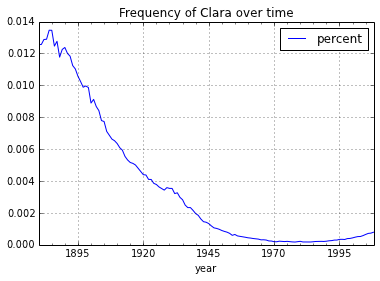

In [4]:
# Use your favorite name here...
name = "Clara"
fav_name = names.loc[name]
print fav_name
# The hierarchical index still has a constant column for the sex. Let's extract that
fav_name = fav_name.loc['girl']
# And now plot the frequencies
fav_name.plot(title='Frequency of %s over time' % name)

The total percentage in the 2000 most popular names (1000 boys, 1000 girls), grouped by year. A small number indicates little diversity.

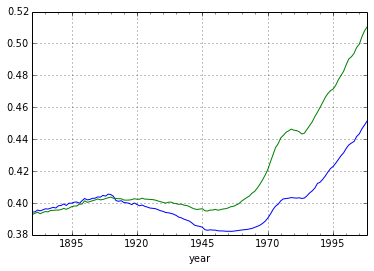

In [5]:
# In addition to loc, xs should be used to extract a cross-section of the DF 
# if you need to specify a level for the index value provided. 
# Also this illutrates that groupby can be done on an index, not only on a column
boy_diversity = names.xs('boy', level="sex").groupby(level='year')['percent'].sum()
girl_diversity = names.xs('girl', level='sex').groupby(level='year')['percent'].sum()
boy_diversity = boy_diversity.apply(lambda v: exp(-v))
girl_diversity = girl_diversity.apply(lambda v: exp(-v))
boy_diversity.plot()
girl_diversity.plot()

Get the most popular names of all times.

In [6]:
# Let's group all entries by the sex first and the name second. In effect we 
# are removing the dates that way. To aggregate that extra time dimension, 
# we will sum up the values in each group:
summed_names = names.groupby(level=(1, 0))['percent'].sum()
print summed_names

sex  name    
boy  Aaden       0.000442
     Aarav       0.000101
     Aaron       0.292292
     Ab          0.000218
     Abb         0.000137
     Abbie       0.000092
     Abbott      0.000088
     Abdiel      0.000092
     Abdul       0.001408
     Abdullah    0.001122
     Abe         0.017558
     Abel        0.019486
     Abelardo    0.000041
     Abie        0.000042
     Abner       0.007306
...
girl  Zhane     0.000306
      Zillah    0.000183
      Zilpah    0.000091
      Zilpha    0.000433
      Zina      0.001360
      Zion      0.000737
      Zita      0.001547
      Zoa       0.000520
      Zoe       0.037816
      Zoey      0.009506
      Zoie      0.002322
      Zola      0.008304
      Zona      0.005813
      Zora      0.010687
      Zula      0.009292
Name: percent, Length: 7455, dtype: float64


In [7]:
# Let's now extract one gender and sort the resulting Series
top_boys = summed_names.loc['boy']
top_girls = summed_names.loc['girl']
top_boys.sort(ascending=False)
top_girls.sort(ascending=False)
print top_boys.head(20)
print
print top_girls.head(20)

name
John           5.299585
James          4.574991
William        4.409453
Robert         3.821662
Charles        2.518147
Michael        2.366102
Joseph         2.292487
David          2.159018
George         2.096747
Thomas         1.901267
Richard        1.829625
Edward         1.427891
Frank          1.339841
Daniel         1.098732
Paul           1.073593
Donald         1.034592
Christopher    1.029456
Henry          0.959094
Walter         0.905720
Kenneth        0.834618
Name: percent, dtype: float64

name
Mary         4.511860
Elizabeth    1.392100
Margaret     1.360965
Helen        1.234222
Anna         1.195867
Dorothy      1.065111
Barbara      1.001579
Patricia     0.999798
Ruth         0.942272
Linda        0.837364
Jennifer     0.820391
Betty        0.817489
Sarah        0.817214
Alice        0.712123
Nancy        0.704694
Susan        0.669830
Frances      0.663941
Laura        0.656010
Marie        0.655181
Emma         0.648518
Name: percent, dtype: float64


In [8]:
# Over time, the total number of girl names is
top_girls.shape
# Let's see the names in the middle of the popularity list and at the end
print top_girls[2000:2020]
print 
print top_girls.tail(20)

name
Loyce         0.002103
Michell       0.002093
Alysa         0.002093
Lutie         0.002093
Hadley        0.002092
Lilliana      0.002091
Anthony       0.002088
Lindy         0.002083
Bonny         0.002074
Arlie         0.002074
Addyson       0.002073
Catina        0.002069
Annamae       0.002067
Bernardine    0.002063
Donald        0.002059
Farrah        0.002059
Oralia        0.002059
Donie         0.002055
Salina        0.002053
Carlotta      0.002048
Name: percent, dtype: float64

name
Chanie      0.000041
Delina      0.000041
Dayse       0.000041
Elzada      0.000041
Chrissie    0.000041
Achsah      0.000040
Eithel      0.000040
Amey        0.000040
Dollye      0.000040
Chester     0.000040
Chestina    0.000040
Daisye      0.000040
Ala         0.000040
Alabama     0.000040
Clem        0.000040
Dema        0.000040
Crissie     0.000040
Alfred      0.000040
Angele      0.000039
Alwilda     0.000039
Name: percent, dtype: float64


What about nicknames? Let's group Chris and Christopher together and study the popularity of either of them.

In [9]:
names.loc[['Chris', 'Christopher']]

,,,percent
name,sex,year,
Christopher,boy,1880-01-01,0.000819
Chris,boy,1880-01-01,0.000414
Christopher,boy,1881-01-01,0.000628
Chris,boy,1881-01-01,0.000480
Christopher,boy,1882-01-01,0.000737
Chris,boy,1882-01-01,0.000320
Christopher,boy,1883-01-01,0.000791
Chris,boy,1883-01-01,0.000418
Christopher,boy,1884-01-01,0.000554


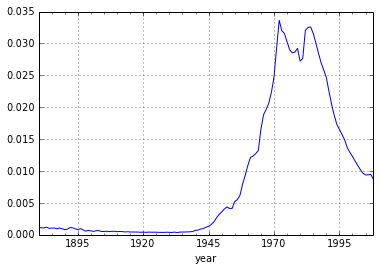

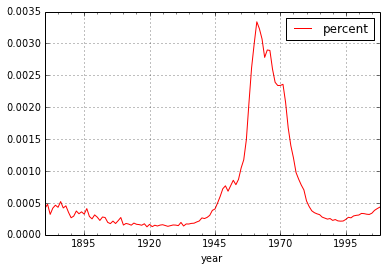

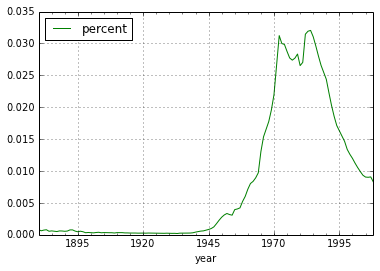

In [10]:
names.loc[['Chris', 'Christopher']].groupby(level=2)['percent'].sum().plot(label='Both')
names.loc["Chris"].loc["boy"].plot(style='r-', label='Chris')
names.loc["Christopher"].loc["boy"].plot(style='g-', label='Christopher')

Axes(0.125,0.125;0.775x0.775)


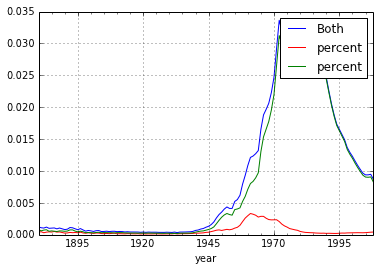

In [11]:
# Let's force them together in one plot
from matplotlib import pyplot as plt
ax = plt.subplot(1,1,1)
print ax
names.loc[['Chris', 'Christopher']].groupby(level=2)['percent'].sum().plot(label='Both', ax=ax)
names.loc["Chris"].loc["boy"].plot(style='r-', label='Chris', ax=ax)
names.loc["Christopher"].loc["boy"].plot(style='g-', label='Christopher', ax=ax)
plt.legend()

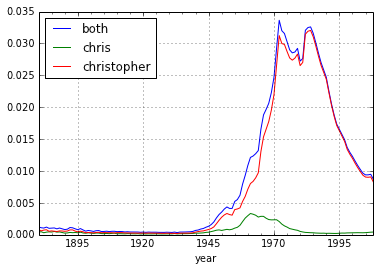

In [12]:
# Another way would be to create a DF and plot that new object:
both = names.loc[['Chris', 'Christopher']].groupby(level=2)['percent'].sum()
chris = names.loc["Chris"].loc["boy"]["percent"]
christopher = names.loc["Christopher"].loc["boy"]["percent"]
df = pd.DataFrame({"both":both, "chris":chris, "christopher":christopher})
df.plot()

In [13]:
# if we didn't want to assume that both names appeared every year, we would  need to align 
# the timeseries:
chris, both = chris.align(both, join="right", fill_value=0)
christopher, both = christopher.align(both, join="right", fill_value=0)
# Or more efficiently:
christopher, chris = christopher.align(chris, join="outer", fill_value=0)